# Temperatura Global

[Berkeley Earth](http://berkeleyearth.org/) publica datos históricos de temperaturas globales y regionales.

En este notebook intentaremos recrear la siguiente gráfica, publicada en el [Global Temperature Report for 2019](http://berkeleyearth.org/2019-temperatures/).

![image](http://berkeleyearth.org/wp-content/uploads/2020/01/2019_Projection-1024x577.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
temperature_data = np.loadtxt("http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt", comments="%")
print(temperature_data)

[[ 1.750e+03  1.000e+00 -2.210e-01 ...        nan        nan        nan]
 [ 1.750e+03  2.000e+00 -1.624e+00 ...        nan        nan        nan]
 [ 1.750e+03  3.000e+00 -5.240e-01 ...        nan        nan        nan]
 ...
 [ 2.019e+03  1.000e+01  1.480e+00 ...        nan        nan        nan]
 [ 2.019e+03  1.100e+01  1.187e+00 ...        nan        nan        nan]
 [ 2.019e+03  1.200e+01  1.756e+00 ...        nan        nan        nan]]


In [36]:

temperature_anomaly = temperature_data[:, 2]
temperature_err = temperature_data[:, 3]
temperature_avg = temperature_data[:, 4]
temperature_avg_err = temperature_data[:, 5]

In [37]:
years = temperature_data[:, 0]
months = temperature_data[:, 1]
temperature = temperature_data[:, 8]

times = years + 1 / 12 * (months - 1)

In [38]:
print(times)
print(temperature)

[1750.         1750.08333333 1750.16666667 ... 2019.75       2019.83333333
 2019.91666667]
[nan nan nan ... nan nan nan]


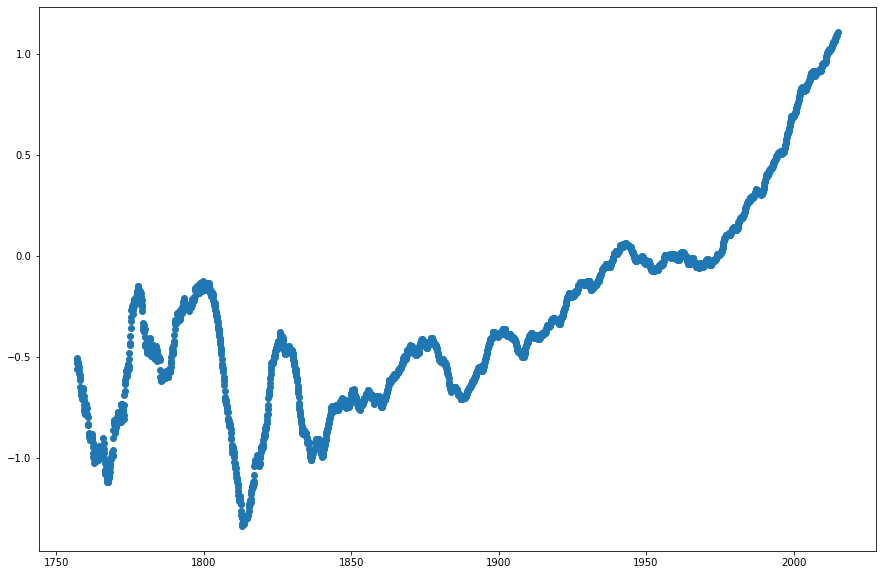

In [40]:
plt.figure(figsize=(15, 10))
plt.scatter(times, temperature)
plt.show()

In [6]:
temperature_reference = 8.64

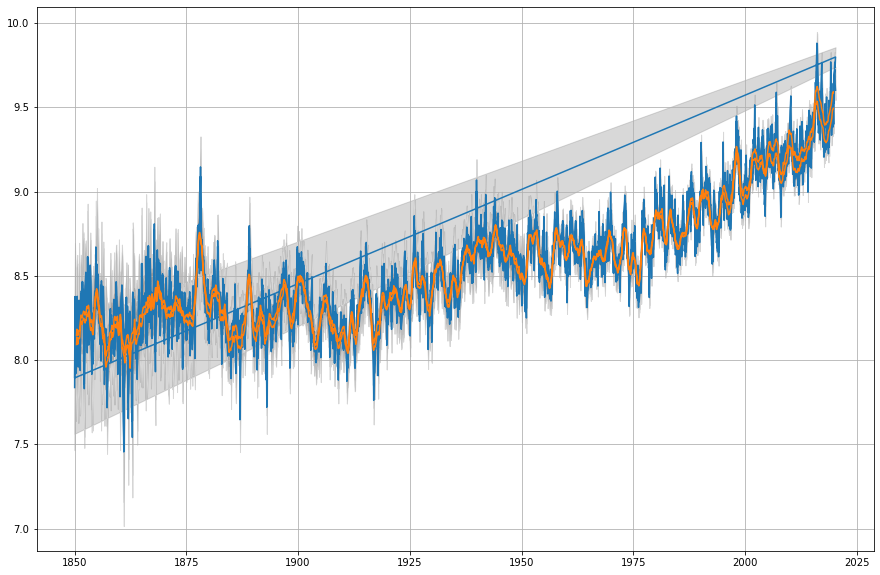

In [7]:
temperature = temperature_anomaly + temperature_reference
temperature_average = temperature_avg + temperature_reference

plt.figure(figsize=(15, 10))
plt.plot(times, temperature)
plt.fill_between(times, temperature - temperature_err, temperature + temperature_err, color="grey", alpha=0.3)
plt.plot(times, temperature_average)
plt.fill_between(times, temperature_average - temperature_avg_err, temperature_average + temperature_avg_err, color="grey", alpha=0.3)
plt.grid()
plt.show()

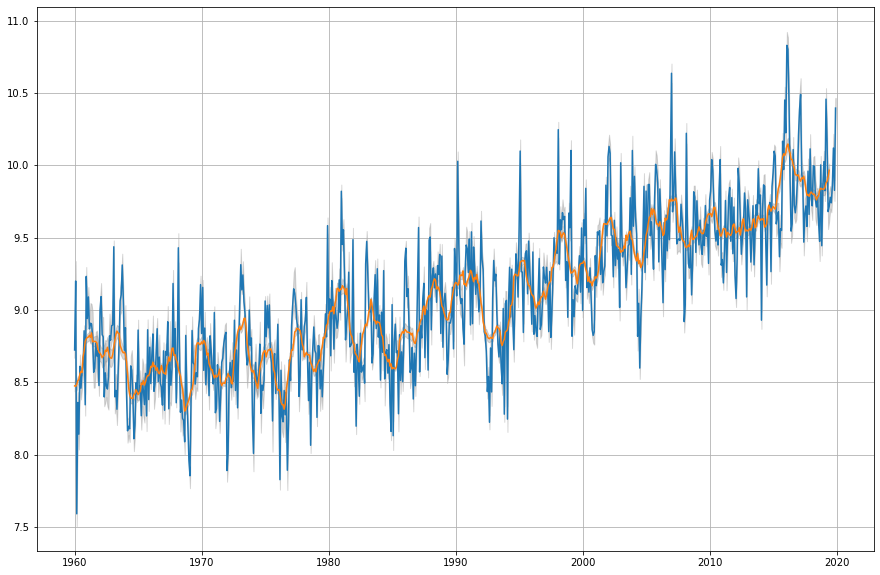

In [14]:
recent = times >= 1960

plt.figure(figsize=(15, 10))
plt.plot(times[recent], temperature[recent])
plt.fill_between(times[recent], temperature[recent] - temperature_err[recent], temperature[recent] + temperature_err[recent], color="grey", alpha=0.3)
plt.plot(times[recent], temperature_average[recent])
plt.fill_between(times[recent], temperature_average[recent] - temperature_avg_err[recent], temperature_average[recent] + temperature_avg_err[recent], color="grey", alpha=0.3)
plt.grid()
plt.show()

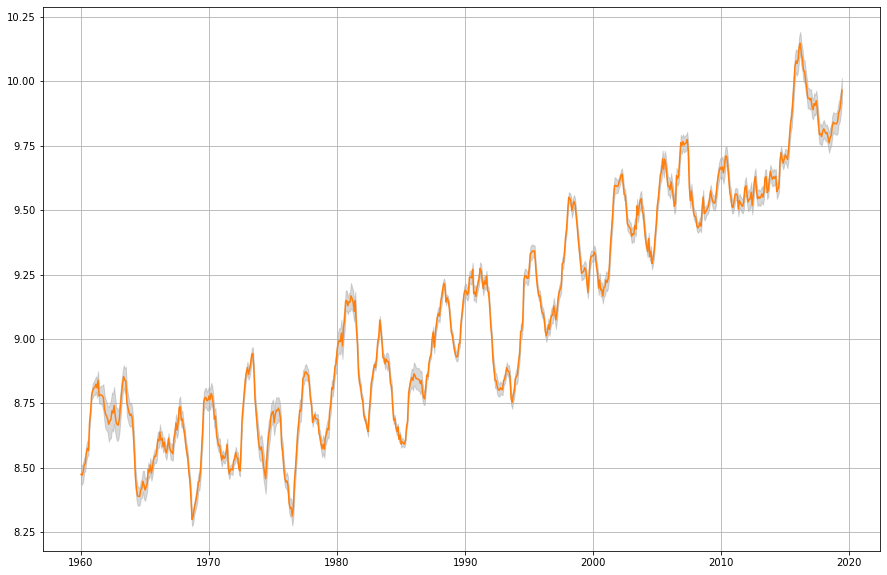

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(times[recent], temperature_average[recent], color="C1")
plt.fill_between(times[recent], temperature_average[recent] - temperature_avg_err[recent], temperature_average[recent] + temperature_avg_err[recent], color="grey", alpha=0.3)
plt.grid()
plt.show()